In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv('../data/cumulative_2022.04.28_05.30.33.csv', header=53)
data.head()


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [90]:
# Pop the columns:

to_pop = ["kepoi_name", "kepler_name", "koi_teq_err1",
          "koi_teq_err2", "koi_tce_delivname"]

for col in to_pop:
    data.pop(col)

# Numerische Werte:
koi_disposition_dict = {'FALSE POSITIVE': 0, 'CANDIDATE': 1, 'CONFIRMED': 2}
data["koi_disposition"] = data["koi_disposition"].replace(
    koi_disposition_dict)

koi_pdisposition_dict = {'FALSE POSITIVE': 0, 'CANDIDATE': 1}
data["koi_pdisposition"] = data["koi_pdisposition"].replace(
    koi_pdisposition_dict)
data.head()


,kepid,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,2,1,1.000,0,0,0,0,9.488036,2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,2,1,0.969,0,0,0,0,54.418383,2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,1,1,0.000,0,0,0,0,19.899140,1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,0,0,0.000,0,1,0,0,1.736952,2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,2,1,1.000,0,0,0,0,2.525592,3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [91]:
# Testen, ob Imputing Werte verfälscht.
#data = data[data['koi_score'].notna()]
#for column in data:
#    print(data[column][data[column].isna()])
print(data.shape)
data.isna().sum()


(9564, 44)


kepid                   0
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad    

In [92]:
number_of_nan = data.isna().sum().sum()
number_of_values = np.shape(data)[0]*np.shape(data)[1]
ratio_nan_to_numbers = number_of_nan/number_of_values
print(f"Insgesamt gibt es {data.isna().sum().sum()} NaN-Werte")
print(
    f"Anteil der NaN-Werte an Allen Werten = {ratio_nan_to_numbers}")
print(f"(Also sollten dieser Anteil an Werten beim Imputing-Test durch NaNs ersetzt werden.")


Insgesamt gibt es 13813 NaN-Werte
Anteil der NaN-Werte an Allen Werten = 0.03282432226911524
(Also sollten dieser Anteil an Werten beim Imputing-Test durch NaNs ersetzt werden.


In [93]:
print(data.shape)
data_imptest = data.dropna()
print(data_imptest.shape)
number_of_values_imptest = np.shape(data_imptest)[0]*np.shape(data_imptest)[1]
values_to_remove = number_of_values_imptest*ratio_nan_to_numbers
#data_imptest.isna().sum()
print(
    f"Es sollten {values_to_remove} Werte im Imputing-Test-Datensatz durch NaN ersetzt werden.")


(9564, 44)
(7803, 44)
Es sollten 11269.640213299874 Werte im Imputing-Test-Datensatz durch NaN ersetzt werden.


In [94]:
x_original = data_imptest.drop(['koi_disposition'], axis=1)
y = data_imptest['koi_disposition']
x = x_original.copy()
print(x_original.shape)
type(x_original)
#x.iloc[0:10,0:10]


(7803, 43)


pandas.core.frame.DataFrame

In [95]:
remove_n = int(round(values_to_remove))
# Array mit Länge remove_n, gefüllt mit zufälligen Ganzzahlen zwischen 0 und der Anzahl der Zeilen
rows = np.random.randint(0,x.shape[0],size=remove_n)
# Array mit Länge remove_n, gefüllt mit zufälligen Ganzzahlen zwischen 0 und der Anzahl der Spalten
cols = np.random.randint(0,x.shape[1],size=remove_n)


In [96]:
print(x.shape)
for ri, ci in list(zip(rows, cols)):
    #print("x[ri, ci].shape =", x[ri, ci].shape)
    #print(x[ri,ci])
    #print("ri =", ri, "ci =", ci)
    x.iloc[ri,ci] = np.nan
    #print(x[ri, ci])

print(x.shape)


(7803, 43)
(7803, 43)


In [97]:
print(x.shape)
print(y.shape)
print(f"{np.count_nonzero(np.isnan(x))} von {x.size} Werten fehlen")

(7803, 43)
(7803,)
11076 von 335529 Werten fehlen


In [98]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=45)



In [99]:
print(f"{np.count_nonzero(np.isnan(x_train))} von {x_train.size} Werten im Trainingsdatensatz fehlen")
print(f"{np.count_nonzero(np.isnan(x_test))} von {x_test.size} Werten im Testdatensatz fehlen")


7449 von 224804 Werten im Trainingsdatensatz fehlen
3627 von 110725 Werten im Testdatensatz fehlen


In [100]:
mean = np.mean(x_train, axis=0)
mean


kepid                7.680599e+06
koi_pdisposition     5.191051e-01
koi_score            4.882082e-01
koi_fpflag_nt        1.870688e-01
koi_fpflag_ss        2.682540e-01
koi_fpflag_co        2.198891e-01
koi_fpflag_ec        1.319115e-01
koi_period           3.627106e+01
koi_period_err1      9.035938e-04
koi_period_err2     -9.003968e-04
koi_time0bk          1.575051e+02
koi_time0bk_err1     7.549633e-03
koi_time0bk_err2    -7.480963e-03
koi_impact           6.141271e-01
koi_impact_err1      2.202210e+00
koi_impact_err2     -2.873515e-01
koi_duration         5.353705e+00
koi_duration_err1    2.474873e-01
koi_duration_err2   -2.474794e-01
koi_depth            2.613017e+04
koi_depth_err1       6.482479e+01
koi_depth_err2      -6.508268e+01
koi_prad             2.958229e+01
koi_prad_err1        7.416846e+00
koi_prad_err2       -8.223409e+00
koi_teq              1.135930e+03
koi_insol            6.712987e+03
koi_insol_err1       3.057235e+03
koi_insol_err2      -3.690540e+03
koi_model_snr 

In [101]:
#print(x_train[:20])
knn_imputer = KNNImputer()
knn_imputer.fit(x_train)
x_train = knn_imputer.transform(x_train)
x_test = knn_imputer.transform(x_test)
#x_train[:20]


In [102]:
print(f"{np.count_nonzero(np.isnan(x_train))} von {x_train.size} Werten im Trainingsdatensatz fehlen")
print(f"{np.count_nonzero(np.isnan(x_test))} von {x_test.size} Werten im Testdatensatz fehlen")


0 von 224804 Werten im Trainingsdatensatz fehlen
0 von 110725 Werten im Testdatensatz fehlen


In [108]:
mean_squared_error(knn_imputer.transform(x),x_original)

c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNNImputer was fitted without feature names
  warnings.warn(


6485793464.908249

c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was f

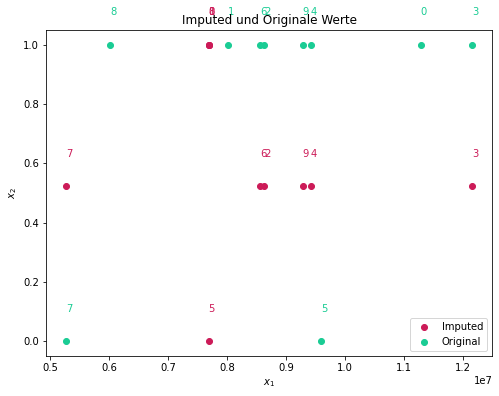

In [105]:
plt.figure(figsize=(8, 6))
label_imputed, label_original = "", ""
for i in range(10):
    # Plot Labels nur einmal
    if i == 9:
        label_imputed = "Imputed"
        label_original = "Original"

    # Errechne die fehlenden Werte
    x1, x2 = imputer.transform(x)[rows[np.where(cols <= 1)][i], :1], imputer.transform(x)[rows[np.where(cols <= 1)][i], 1:2]

    # Plotte die Imputed Werte und fortlaufende Nummer
    plt.scatter(x1, x2, c="#CC1B58", label=label_imputed)
    plt.text(x1-0.03, x2+0.1, str(i), c="#CC1B58")

    # Plotte die originalen Werte und fortlaufende Nummmer
    plt.scatter(x_original.iloc[rows[np.where(cols <= 1)][i], :1], x_original.iloc[rows[np.where(cols <= 1)][i], 1:2], c="#1ACC94", label=label_original)
    plt.text(x_original.iloc[rows[np.where(cols <= 1)][i], :1]-0.03,
             x_original.iloc[rows[np.where(cols <= 1)][i], 1:2]+0.1, str(i), c="#1ACC94")

# Plot beschreiben
#plt.xlim(np.min(x_original.iloc[:, :1]), np.max(x_original.iloc[:, :1]))
#plt.ylim(np.min(x_original.iloc[:, 1:2]), np.max(x_original.iloc[:, 1:2]))
plt.title("Imputed und Originale Werte")
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


In [106]:
x_original.iloc[rows[np.where(cols <= 1)][0:2], 40:42]


,ra,dec
3511,284.56689,49.012550
3328,287.43918,43.832088


c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNNImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNNImputer was fitted without feature names
  warnings.warn(
c:\Users\Marco\Documents\GitHub\Kepler-Exoplaneten-ML-Projekt\.venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

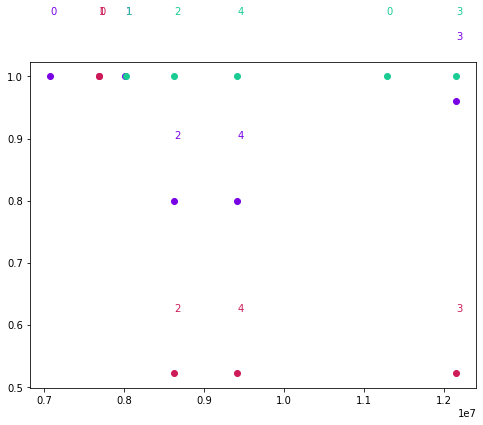

In [107]:
knn_imputer = KNNImputer()
knn_imputer.fit(x_train)
x_train = knn_imputer.transform(x_train)
x_test = knn_imputer.transform(x_test)

plt.figure(figsize=(8, 6))
label_imputed, label_original, label_knn_imputed = "", "", ""
for i in range(5):
    # Plot Labels nur einmal
    if i == 4:
        label_imputed = "Imputed"
        label_knn_imputed = "Knn Imputed"
        label_original = "Original"

    # Errechne die fehlenden Werte
    x1, x2 = imputer.transform(x)[rows[np.where(cols <= 1)][i], :1], imputer.transform(x)[
        rows[np.where(cols <= 1)][i], 1:2]

    # Plotte die Imputed Werte und fortlaufende Nummer
    plt.scatter(x1, x2, c="#CC1B58", label=label_imputed)
    plt.text(x1-0.03, x2+0.1, str(i), c="#CC1B58")

    # Errechne die fehlenden Werte
    knnx1, knnx2 = knn_imputer.transform(x)[rows[np.where(
        cols <= 1)][i], :1], knn_imputer.transform(x)[rows[np.where(cols <= 1)][i], 1:2]

    # Plotte die Imputed Werte und fortlaufende Nummer
    plt.scatter(knnx1, knnx2, c="#7902E5", label=label_knn_imputed)
    plt.text(knnx1-0.03, knnx2+0.1, str(i), c="#7902E5")

    # Plotte die originalen Werte und fortlaufende Nummmder
    plt.scatter(x_original.iloc[rows[np.where(cols <= 1)][i], :1], x_original.iloc[rows[np.where(
        cols <= 1)][i], 1:2], c="#1ACC94", label=label_original)
    plt.text(x_original.iloc[rows[np.where(cols <= 1)][i], :1]-0.03,
             x_original.iloc[rows[np.where(cols <= 1)][i], 1:2]+0.1, str(i), c="#1ACC94")

# Plot beschreiben
plt.xlim(np.min(x_original.iloc[:, :1]), np.max(x_original.iloc[:, :1]))
plt.ylim(np.min(x_original.iloc[:, 1:2]), np.max(x_original.iloc[:, 1:2]))
plt.title("Imputierte und originale Werte")
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()
